<a href="https://colab.research.google.com/github/220660121179/UAS-BDA-_220660121179_DedeYayanSuciyana_IF4A/blob/main/UAS(Google%20colab)_220660121179.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv to Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv


In [3]:
file_name = 'Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv'
data = pd.read_csv(file_name)

In [4]:
print("Dataset Head:\n", data.head())
print("Dataset Info:\n", data.info())
print("Missing Values:\n", data.isnull().sum())

Dataset Head:
              Cause                           Type  Year  Data Redundancy  \
0  Abrasi Air Laut                   Bencana Alam  2012                1   
1             AIDS  Bencana Non Alam dan Penyakit  2000                1   
2             AIDS  Bencana Non Alam dan Penyakit  2001                1   
3             AIDS  Bencana Non Alam dan Penyakit  2002                1   
4             AIDS  Bencana Non Alam dan Penyakit  2003                1   

   Total Deaths                                 Source Page at Source  \
0             0  Profil Kesehatan Indonesia Tahun 2012  Lampiran 3.38   
1            47  Profil Kesehatan Indonesia Tahun 2004             78   
2            99  Profil Kesehatan Indonesia Tahun 2004             78   
3           100  Profil Kesehatan Indonesia Tahun 2004             78   
4           261  Profil Kesehatan Indonesia Tahun 2010            115   

                                          Source URL  
0  https://pusdatin.kemkes.go.id/d

In [5]:
data = data.dropna()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
features = data.columns[1:]

In [8]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])


In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
data['Cluster'] = kmeans.labels_

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

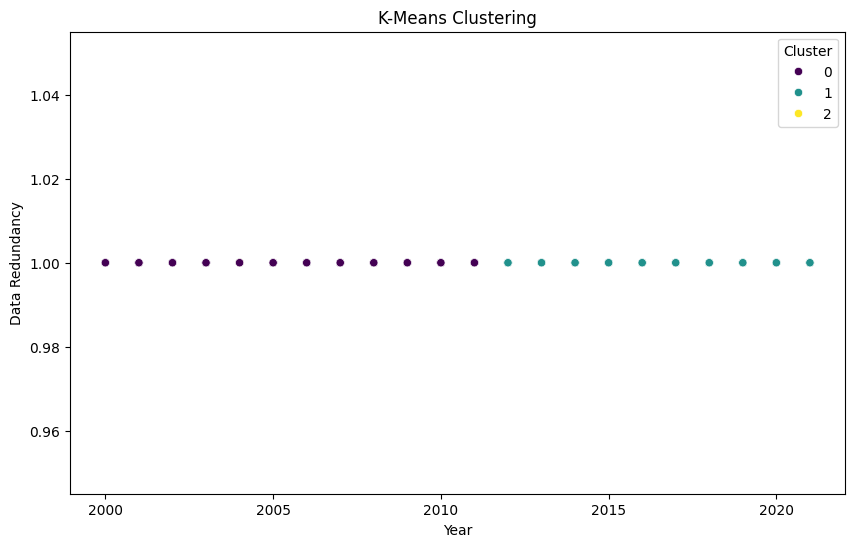

In [13]:
if len(numerical_features) >= 2:
    feature1 = numerical_features[0]
    feature2 = numerical_features[1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature1, y=feature2, hue='Cluster', palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

In [14]:
data.to_csv('clustered_data.csv', index=False)

In [15]:
import pandas as pd

In [16]:
file_name = 'clustered_data.csv'
df_clustered = pd.read_csv(file_name)

In [17]:
print("Dataset Clustered Head:\n", df_clustered.head())
print("Dataset Clustered Info:\n", df_clustered.info())

Dataset Clustered Head:
              Cause                           Type  Year  Data Redundancy  \
0  Abrasi Air Laut                   Bencana Alam  2012                1   
1             AIDS  Bencana Non Alam dan Penyakit  2000                1   
2             AIDS  Bencana Non Alam dan Penyakit  2001                1   
3             AIDS  Bencana Non Alam dan Penyakit  2002                1   
4             AIDS  Bencana Non Alam dan Penyakit  2003                1   

   Total Deaths                                 Source Page at Source  \
0             0  Profil Kesehatan Indonesia Tahun 2012  Lampiran 3.38   
1            47  Profil Kesehatan Indonesia Tahun 2004             78   
2            99  Profil Kesehatan Indonesia Tahun 2004             78   
3           100  Profil Kesehatan Indonesia Tahun 2004             78   
4           261  Profil Kesehatan Indonesia Tahun 2010            115   

                                          Source URL  Cluster  
0  https://pusd

In [18]:
print("Jumlah data pada tiap cluster:\n", df_clustered['Cluster'].value_counts())

Jumlah data pada tiap cluster:
 Cluster
0    415
1    261
2      1
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Numerical Features:
 Index(['Year', 'Data Redundancy', 'Total Deaths', 'Cluster'], dtype='object')


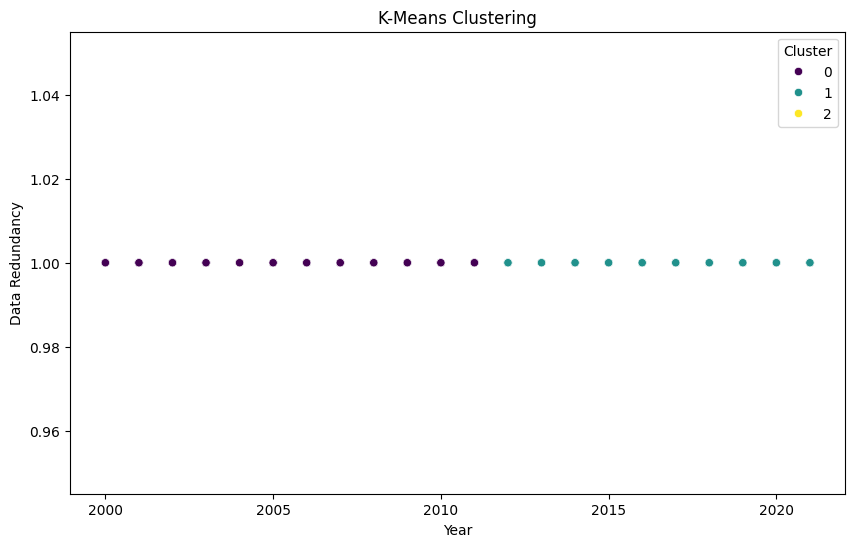

In [20]:
numerical_features = df_clustered.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:\n", numerical_features)

if len(numerical_features) >= 2:
    feature1 = numerical_features[0]
    feature2 = numerical_features[1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_clustered, x=feature1, y=feature2, hue='Cluster', palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

In [21]:
numerical_features = df_clustered.select_dtypes(include=['int64', 'float64']).columns

cluster_summary = df_clustered.groupby('Cluster')[numerical_features].mean()
print("Ringkasan Tiap Cluster:\n", cluster_summary)

Ringkasan Tiap Cluster:
                Year  Data Redundancy   Total Deaths  Cluster
Cluster                                                     
0        2006.46747              1.0    1478.400000      0.0
1        2016.97318              1.0     325.854406      1.0
2        2004.00000              1.0  129171.000000      2.0
